In [1]:
cd ..

/home/va0831/Projects/FourierDrawing


/home/va0831/slr/end_slr/lib64/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


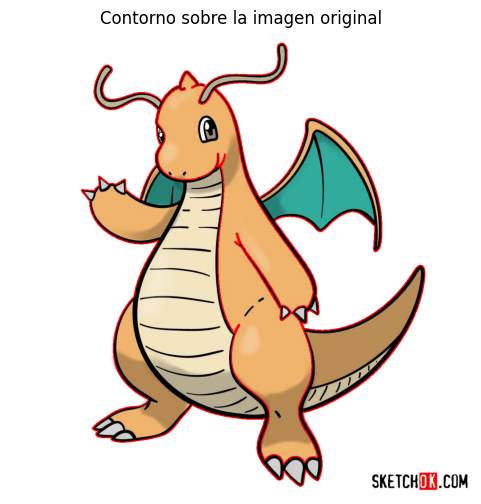

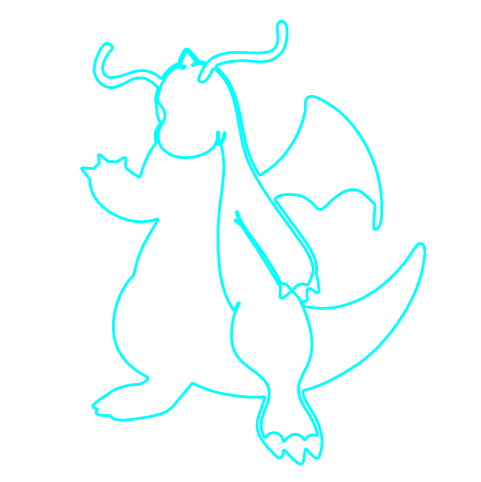

In [2]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 1) load your contour
img = cv2.imread("images/dragonite.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)
cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(cnts, key=cv2.contourArea)
pts = contour.squeeze()

# Dibujar el contorno sobre la imagen original
img2 = cv2.drawContours(img.copy(), [contour], -1, (0, 0, 255), 2)  # rojo, grosor 2
# Mostrar imagen con matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
plt.title("Contorno sobre la imagen original")
plt.axis('off')
plt.show()

# 2) make complex signal and center
z      = pts[:,0] + 1j*pts[:,1]
z_mean = z.mean()
z0     = z - z_mean
N      = len(z0)

# 3) FFT, pick top_k
K   = 1000
C   = np.fft.fft(z0)                
idx = np.argsort(np.abs(C))[-K:]   # indices of K largest modes
mask = np.zeros(N, bool)
mask[idx] = True
C_filt = C * mask

# 4) inverse FFT → approximate contour
z_approx = np.fft.ifft(C_filt) + z_mean

# 5) plot full shape
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cv2.cvtColor(img*0+255, cv2.COLOR_BGR2RGB))
ax.plot(z_approx.real, z_approx.imag, color='cyan', linewidth=2)
ax.axis('off')
plt.show()
